## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#### 1. Finding the Correlation between the features

In [5]:
_X = data.drop(['target'], axis=1)

corr=_X.corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


<AxesSubplot:title={'center':'Correlation between features'}>

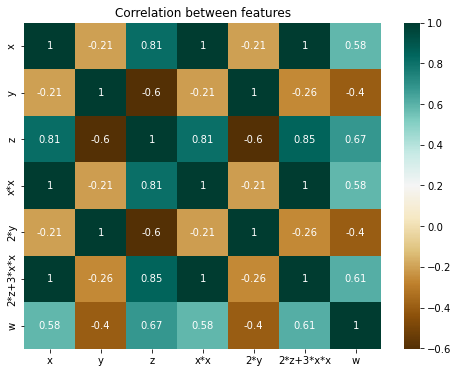

In [7]:
plt.figure(figsize=(8,6))
plt.title("Correlation between features")
sns.heatmap(corr, cmap="BrBG",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

## Task: 1 Logistic Regression

#### 2. Finding the best model for the given data

In [8]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
LR = LogisticRegression(random_state=12)

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [9]:
LR = GridSearchCV(LR, param_grid, cv=5)

In [10]:
LR.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=12),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [11]:
LR.best_params_

{'C': 1e-05}

#### 3. Getting the weights with the original data

In [12]:
best_model=LogisticRegression(C=1e-05,random_state=12)

In [13]:
best_model.fit(X,Y)

LogisticRegression(C=1e-05, random_state=12)

In [14]:
Y_predictions = best_model.predict(X)

In [15]:
accuracy=accuracy_score(Y, Y_predictions)
print(accuracy)

1.0


In [16]:
model_weights = best_model.coef_[0]
print(model_weights)

[ 0.00036369 -0.000345    0.00048449  0.00035933 -0.000345    0.00038189
  0.00032048]


#### 4. Modifying original data

In [17]:
# Adding noise to data
noise = np.random.normal(0, .01, X.shape)
X_NEW = X + noise

In [18]:
X[0]

array([-0.5810659 ,  0.84183714, -1.01297765, -0.60402468,  0.84183714,
       -0.66592679, -0.53627703])

In [19]:
X_NEW[0]

array([-0.58610099,  0.83000988, -1.00465536, -0.58679823,  0.85521603,
       -0.64755832, -0.5408426 ])

In [20]:
updated_model = best_model.fit(X_NEW,Y)

In [21]:
Y_prediction = best_model.predict(X_NEW)

In [22]:
new_accuracy = accuracy_score(Y, Y_prediction)
print(new_accuracy)

1.0


In [23]:
updated_model_weights = updated_model.coef_[0]
print(updated_model_weights)

[ 0.00036373 -0.00034464  0.0004848   0.00035966 -0.00034446  0.00038265
  0.00032034]


#### 5. Checking deviations in metric and weights

In [24]:
print(f'Difference in accuracy of models is {new_accuracy-accuracy}')

Difference in accuracy of models is 0.0


In [25]:
difference_in_weights=abs((model_weights-updated_model_weights))
print(f'Difference in weights of models is {difference_in_weights}')

Difference in weights of models is [4.04560532e-08 3.64436223e-07 3.08259392e-07 3.32445143e-07
 5.37383082e-07 7.61994110e-07 1.45028034e-07]


In [26]:
# calulating the percentage change in weight
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   
    c=(difference_in_weights[i]/model_weights[i])*100
    percentage_change.append(c)

In [27]:
columns=list(data.columns)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("The top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])
#indices

The top 4 features which have higher % change in weights 
w
z
x*x
2*z+3*x*x


## Task: 2 Linear SVM

#### 2. Finding the best model for the given data

In [28]:
alpha =  np.logspace(-5, 8, 10)
print(alpha)
param_grid={'C':alpha}
SVM = SVC(kernel="linear",random_state=12)

[1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [29]:
SVM = GridSearchCV(SVM, param_grid, cv=5)

In [30]:
SVM.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=12),
             param_grid={'C': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [31]:
SVM.best_params_

{'C': 0.007742636826811269}

In [32]:
_C = float(SVM.best_params_['C'])
_C

0.007742636826811269

#### 3. Getting the weights with the original data

In [33]:
best_model=SVC(kernel='linear',C=_C,random_state=12)

In [34]:
best_model.fit(X,Y)

SVC(C=0.007742636826811269, kernel='linear', random_state=12)

In [35]:
Y_predictions = best_model.predict(X)

In [36]:
accuracy=accuracy_score(Y, Y_predictions)
print(accuracy)

1.0


In [37]:
model_weights = best_model.coef_[0]
print(model_weights)

[ 0.16056222 -0.20788705  0.32826166  0.14998082 -0.20788705  0.17461587
  0.13401176]


#### 4. Modifying original data

In [38]:
# Adding noise to data
noise = np.random.normal(0, .01, X.shape)
X_NEW = X + noise

In [39]:
X[0]

array([-0.5810659 ,  0.84183714, -1.01297765, -0.60402468,  0.84183714,
       -0.66592679, -0.53627703])

In [40]:
X_NEW[0]

array([-0.58155565,  0.853076  , -1.02110364, -0.59641475,  0.84553727,
       -0.68035835, -0.53592644])

In [41]:
updated_model = best_model.fit(X_NEW,Y)

In [42]:
Y_prediction = best_model.predict(X_NEW)

In [43]:
new_accuracy = accuracy_score(Y, Y_prediction)
print(new_accuracy)

1.0


In [44]:
updated_model_weights = updated_model.coef_[0]
print(updated_model_weights)

[ 0.15757078 -0.21090041  0.3284665   0.14818546 -0.21161054  0.17237751
  0.1295129 ]


#### 5. Checking deviations in metric and weights

In [45]:
print(f'Difference in accuracy of models is {new_accuracy-accuracy}')

Difference in accuracy of models is 0.0


In [46]:
difference_in_weights=abs((model_weights-updated_model_weights))
print(f'Difference in weights of models is {difference_in_weights}')

Difference in weights of models is [0.00299144 0.00301335 0.00020484 0.00179536 0.00372349 0.00223836
 0.00449886]


In [47]:
# calulating the percentage change in weight
n=len(data.columns)-1
percentage_change=[]
for i in range (n):                   
    c=(difference_in_weights[i]/model_weights[i])*100
    percentage_change.append(c)

In [48]:
columns=list(data.columns)
indices=sorted(range(len(percentage_change)), key=lambda i: percentage_change[i])[-4:]
print("The top 4 features which have higher % change in weights ")
for j in indices:
    print(columns[j])

The top 4 features which have higher % change in weights 
x*x
2*z+3*x*x
x
w


## Observations -

1. We have many strong positive correlations with a value of greater than 0.8 and some moderate negative correlation, which may lead to problem of multicollinearity. It may produce skewed or misleading results.
2. Linear Regression and Linear SVM are not immune to this problem and we should fix it before training the model.
3. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. 4. This problem, when two features have high correlation, can be fixed by dropping one of the two features.
5. Another way is to apply dimensionality reduction to counter multicollinearity using PCA.
6. The features which lead to higher % change in weights when added noise are the ones which have very high correlation with other features. We can drop some of these features due to there high correlations and then train the model.